In [29]:
import numpy as np
import pandas as pd

#downloading dataset
!wget -nv -O china_gdp.csv https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv
    
df = pd.read_csv("china_gdp.csv")
df.head(10)

2018-08-15 09:33:58 URL:https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/ML0101ENv3/labs/china_gdp.csv [1218/1218] -> "china_gdp.csv" [1]


,Year,Value
0,1960,5.918412e+10
1,1961,4.955705e+10
2,1962,4.668518e+10
3,1963,5.009730e+10
4,1964,5.906225e+10
5,1965,6.970915e+10
6,1966,7.587943e+10
7,1967,7.205703e+10
8,1968,6.999350e+10
9,1969,7.871882e+10


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

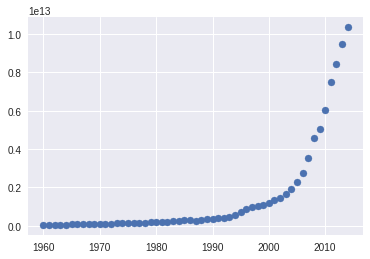

In [34]:
plt.scatter(df['Year'].values,df['Value'].values)

In [0]:
def sigmoid(x, Beta_1, Beta_2):
     y = 1 / (1 + np.exp(-Beta_1*(x-Beta_2)))
     return y

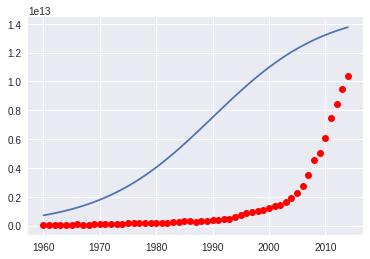

In [48]:
beta_1 = 0.10
beta_2 = 1990.0
x_data, y_data = (df["Year"].values, df["Value"].values)
#logistic function
Y_pred = sigmoid(x_data, beta_1 , beta_2)

#plot initial prediction against datapoints
plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(x_data, y_data, 'ro')

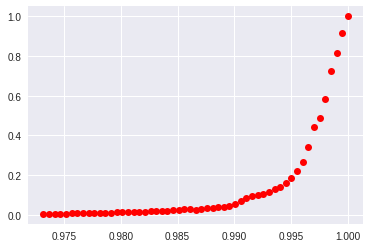

In [52]:
xdata =x_data/max(x_data)
ydata =y_data/max(y_data)

# plt.plot(x_data, Y_pred*15000000000000.)
plt.plot(xdata, ydata, 'ro')

In [53]:
from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, xdata, ydata)
#print the final parameters
print(" beta_1 = %f, beta_2 = %f" % (popt[0], popt[1]))

 beta_1 = 690.453017, beta_2 = 0.997207


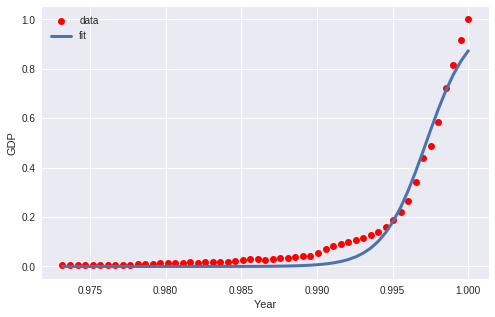

In [64]:
plt.figure(figsize=(8,5))
y = sigmoid(xdata, *popt)
plt.plot(xdata, ydata, 'ro', label='data')
plt.plot(xdata,y, linewidth=3.0, label='fit')
plt.legend(loc='best')
plt.ylabel('GDP')
plt.xlabel('Year')
plt.show()

In [66]:
# write your code here
msk=np.random.rand(len(df))<0.8
train_x=xdata[msk]
train_y=ydata[msk]

test_x=xdata[~msk]
test_y=ydata[~msk]

popt,pcov=curve_fit(sigmoid,train_x,train_y)

y_hat=sigmoid(test_x,*popt)

print(np.mean(np.absolute(y_hat-test_y)))

0.03615877952535536
